<div dir='rtl'>

**فهرست مطالب**<a id='toc0_'></a>    
- [<div dir='rtl'>رگرسیون لجستیک</div>](#toc1_)    
  - [<div dir='rtl'> کتابخانه های لازم </div>](#toc1_1_)    
  - [<div dir='rtl'>فراخوانی دیتا</div>](#toc1_2_)    
  - [<div dir='rtl'>آماده سازی دیتا</div>](#toc1_3_)    
  - [<div dir='rtl'>تقسیم داده ها </div>](#toc1_4_)    
  - [<div dir='rtl'>انتخاب مدل </div>](#toc1_5_)    
  - [<div dir='rtl'>برازش مدل</div>](#toc1_6_)    
  - [<div dir='rtl'>پیش بینی مقادیر تست</div>](#toc1_7_)    
  - [<div dir='rtl'>بررسی دقت مدل</div>](#toc1_8_)    
  - [<div dir='rtl'>ضرایب مدل</div>](#toc1_9_)    
  - [<div dir='rtl'>رگرسیون لجستیک با استفاده از کتابخانه <code>statsmodels</code></div>](#toc1_10_)    
  - [<div dir='rtl'>رسم نمودار رگرسیون لجستیک با استفاده از دو ویژگی </div>](#toc1_11_)    
  - [<div dir='rtl'>رسم نمودار رگرسیون لجستیک با استفاده از سه ویژگی </div>](#toc1_12_)    
- [<div dir='rtl'>نیوتن رافسون</div>](#toc2_)    
  - [<div dir='rtl'>بارگزاری دیتا</div>](#toc2_1_)    
  - [<div dir='rtl'>تقسیم داده ها </div>](#toc2_2_)    
  - [<div dir='rtl'> </div>](#toc2_3_)    
    - [**فرمول تابع سیگموید**](#toc2_3_1_)    
    - [**وظیفه تابع سیگموید**](#toc2_3_2_)    
    - [**عملکرد کد**](#toc2_3_3_)    
    - [**کاربردها**](#toc2_3_4_)    
  - [<div dir='rtl'>توضیح تابع نیوتن رافسون </div>](#toc2_4_)    
  - [<div dir='rtl'>اجرا</div>](#toc2_5_)    

</div>
<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[<div dir='rtl'>رگرسیون لجستیک</div>](#toc0_)

## <a id='toc1_1_'></a>[<div dir='rtl'> کتابخانه های لازم </div>](#toc0_)
<div dir='rtl'>
برای پیاده سازی رگرسیون لجستیک نیازمند استفاده از کتابخانه های <code>numpy,pandas,matplotlib,toolkits,sklearn,statsmodels, warning</code> هستیم 
</div>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import warnings
from sklearn.datasets import load_breast_cancer

## <a id='toc1_2_'></a>[<div dir='rtl'>فراخوانی دیتا</div>](#toc0_)
<div dir='rtl'>
 داده ها را از سایت https://www.kaggle.com/datasets/dragonheir/logistic-regression/data دانلود کردیم 
 
  که شامل ستون های آیدی ,جنسیت,سن,درآمدتخمین زده شده و وضعیت خرید است.
</div>

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## <a id='toc1_3_'></a>[<div dir='rtl'>آماده سازی دیتا</div>](#toc0_)
<div dir='rtl'>
در این مرحله ستون ایدی را حذف کرده و مقادیر خانم و آقا را با مقادیر عددی جایگذاری می کنیم 
</div>

In [ ]:
df =df.drop('User ID',axis = 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

## <a id='toc1_4_'></a>[<div dir='rtl'>تقسیم داده ها </div>](#toc0_)
<div dir='rtl'>
مطابق با فرضیات پروژه به تقسیم بیست درصد تست و اموزش میپردازیم . 
</div>

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:3],df['Purchased'],test_size=0.20,random_state=7)

## <a id='toc1_5_'></a>[<div dir='rtl'>انتخاب مدل </div>](#toc0_)
<div dir='rtl'>
برای انتخاب مدل با توجه به دو وضعیتی بودن متغییر پاسخ مدل لجستیک را انتخاب میکنیم و متد بهینه ساز را نیوتن رافسون انتخاب میکنیم 
</div>

In [ ]:
model = LogisticRegression(solver = 'newton-cg' , max_iter=2000)

## <a id='toc1_6_'></a>[<div dir='rtl'>برازش مدل</div>](#toc0_)

In [ ]:
model.fit(x_train,y_train)
warnings.filterwarnings("ignore")

## <a id='toc1_7_'></a>[<div dir='rtl'>پیش بینی مقادیر تست</div>](#toc0_)

In [ ]:
y_pred = model.predict(x_test)

## <a id='toc1_8_'></a>[<div dir='rtl'>بررسی دقت مدل</div>](#toc0_)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print (f'Accuracy:{accuracy*100}%')

Accuracy:88.75%


## <a id='toc1_9_'></a>[<div dir='rtl'>ضرایب مدل</div>](#toc0_)

In [ ]:
np.set_printoptions(suppress=True)
print(model.coef_)

[[0.1665003  0.22350417 0.00003615]]


## <a id='toc1_10_'></a>[<div dir='rtl'>رگرسیون لجستیک با استفاده از کتابخانه <code>statsmodels</code></div>](#toc0_)

In [ ]:
x_train_with_const = sm.add_constant(x_train)
model = sm.Logit(y_train, x_train_with_const)
result = model.fit(method='newton')
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.352138
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Fri, 07 Mar 2025   Pseudo R-squ.:                  0.4637
Time:                        15:01:23   Log-Likelihood:                -112.68
converged:                       True   LL-Null:                       -210.11
Covariance Type:            nonrobust   LLR p-value:                 5.477e-42
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0850      1.451     -8.331      0.000     -14.928      -9.242
Gender        

## <a id='toc1_11_'></a>[<div dir='rtl'>رسم نمودار رگرسیون لجستیک با استفاده از دو ویژگی </div>](#toc0_)

Optimization terminated successfully.
         Current function value: 0.352138
         Iterations 8


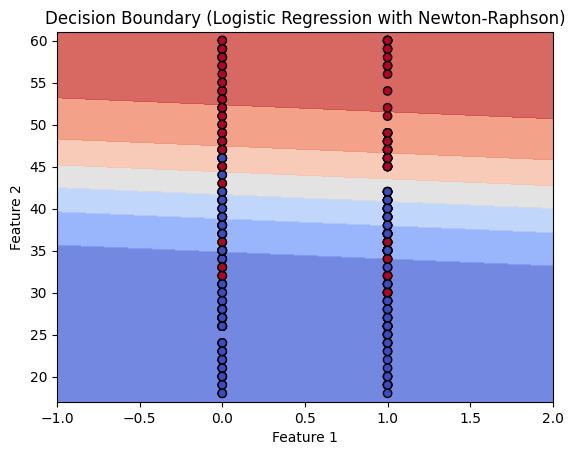

In [ ]:
x_train_with_const = sm.add_constant(x_train)
model = sm.Logit(y_train, x_train_with_const)
result = model.fit(method='newton')
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
X_mesh = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, x_train.iloc[:, 2].mean())]
Z = result.predict(X_mesh)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary (Logistic Regression with Newton-Raphson)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## <a id='toc1_12_'></a>[<div dir='rtl'>رسم نمودار رگرسیون لجستیک با استفاده از سه ویژگی </div>](#toc0_)
<div dir='rtl'>
محورها:

محورهای نمودار نشان‌دهنده سه ویژگی هستند:

Feature 1: محور X

Feature 2: محور Y

Feature 3: محور Z

نقاط داده:

نقاط در نمودار با دو رنگ متفاوت نمایش داده شده‌اند که نمایانگر دو کلاس مختلف در مجموعه داده‌ها هستند.

این رنگ‌ها احتمالاً داده‌های آموزشی را بر اساس برچسب واقعی‌شان (مانند 0 و 1) تفکیک می‌کنند.

مرز تصمیم:

یک سطح صاف (plane) مرز تصمیم را در فضای سه‌بعدی نشان می‌دهد.

این مرز تصمیم توسط مدل یادگرفته شده است و نواحی فضا را به دو بخش تقسیم می‌کند:

نقاط یک طرف سطح به یک کلاس تعلق دارند.

نقاط طرف دیگر به کلاس دوم.

هدف:

این نمودار کمک می‌کند ببینیم مدل چطور کلاس‌های مختلف را در فضای سه‌بعدی از یکدیگر جدا کرده است.

اگر نقاط زیادی در سمت اشتباهی از مرز باشند، مدل ممکن است بهبود بیشتری نیاز داشته باشد.
</div>

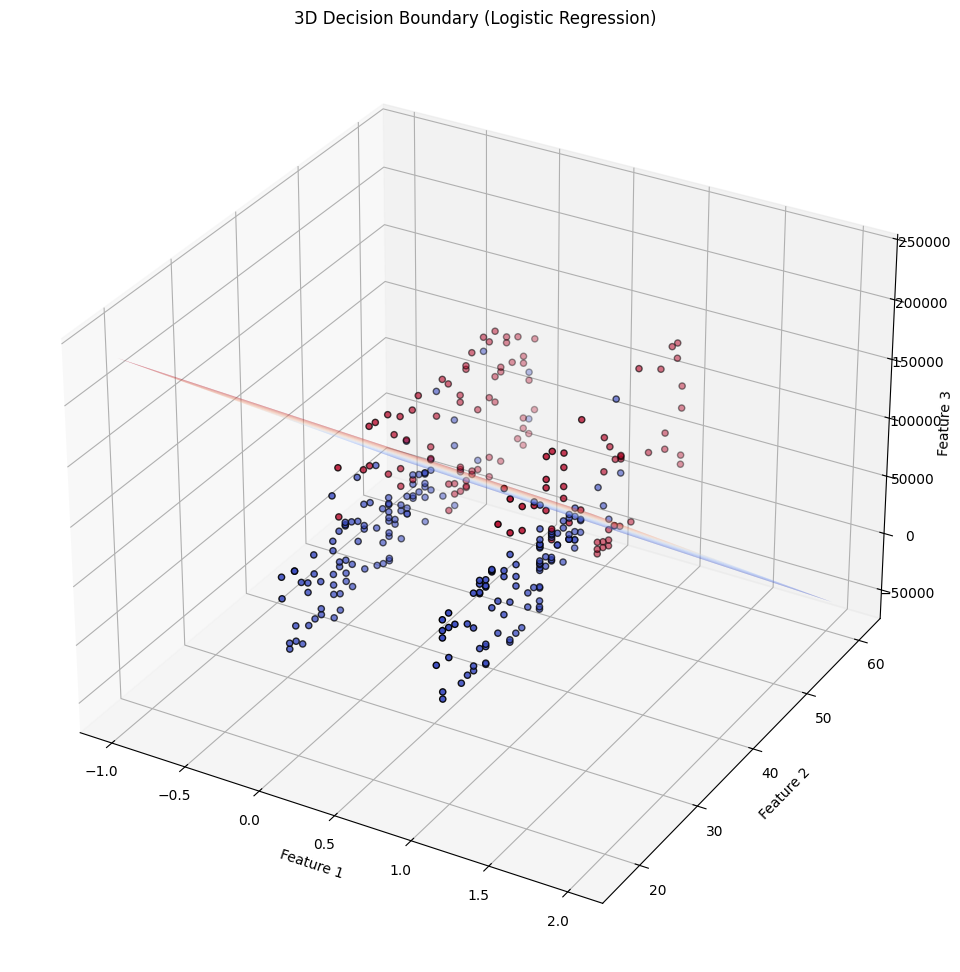

In [ ]:
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
z_min, z_max = x_train.iloc[:, 2].min() - 1, x_train.iloc[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30))
zz = (-result.params[1] * xx - result.params[2] * yy - result.params[0]) / result.params[3]
fig = plt.figure(figsize=(12,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    x_train.iloc[:, 0], x_train.iloc[:, 1], x_train.iloc[:, 2],
    c=y_train, cmap=plt.cm.coolwarm, edgecolor='k'
)
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap=plt.cm.coolwarm)
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.title("3D Decision Boundary (Logistic Regression)")
plt.show()

# <a id='toc2_'></a>[<div dir='rtl'>نیوتن رافسون</div>](#toc0_)

## <a id='toc2_1_'></a>[<div dir='rtl'>بارگزاری دیتا</div>](#toc0_)

In [ ]:
data = load_breast_cancer()
df_2 = pd.DataFrame(data.data, columns=data.feature_names)
df_2['target'] = data.target
X, y = data.data, data.target
df_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## <a id='toc2_2_'></a>[<div dir='rtl'>تقسیم داده ها </div>](#toc0_)
<div dir='rtl'>
مطابق با فرضیات پروژه به تقسیم بیست درصد تست و اموزش میپردازیم . 
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## <a id='toc2_3_'></a>[<div dir='rtl'> </div>](#toc0_)
<div dir='rtl'>
این قطعه‌کد، **تابع سیگموید** (sigmoid) را پیاده‌سازی می‌کند. تابع سیگموید به طور گسترده در مسائل یادگیری ماشین، به ویژه در رگرسیون لجستیک و شبکه‌های عصبی، استفاده می‌شود.

### <a id='toc2_3_1_'></a>[**فرمول تابع سیگموید**](#toc0_)
</div>

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
<div dir='rtl'>

### <a id='toc2_3_2_'></a>[**وظیفه تابع سیگموید**](#toc0_)
تابع سیگموید ورودی \( z \) را به بازه \([0, 1]\) نگاشت می‌کند. ویژگی‌های مهم آن عبارتند از:
- وقتی <div dir='ltr'> $$ z \to +\infty $$ </div>، سیگموید به 1 نزدیک می‌شود.
- وقتی <div dir='ltr'> $$ z \to -\infty $$ </div>، سیگموید به 0 نزدیک می‌شود.

2. **شکل S**:
   - نمودار این تابع شکلی S مانند دارد که باعث می‌شود تغییرات در بازه‌های میانی \( z \) (نزدیک به صفر) بیشتر و حساس‌تر باشد.

### <a id='toc2_3_3_'></a>[**عملکرد کد**](#toc0_)

1. **محاسبه نمایی \( -z \)**:
- با استفاده از `np.exp(-z)`، مقدار<div dir='ltr'>$$e^{-z}$$</div> محاسبه می‌شود.
2. **برگشت مقدار نهایی**:
<div dir="rtl">

- مقدار 
<div dir='ltr'>

$$
\ \frac{1}{1 + e^{-z}} \
$$

</div>
  محاسبه و به عنوان خروجی بازگردانده می‌شود.

</div>


### <a id='toc2_3_4_'></a>[**کاربردها**](#toc0_)
- **رگرسیون لجستیک**: محاسبه احتمال تعلق یک نمونه به کلاس خاص.
- **شبکه‌های عصبی**: به عنوان تابع فعال‌سازی برای نورون‌ها.
- **پیش‌بینی احتمالات**: برای مدل‌هایی که نیاز به خروجی بین 0 و 1 دارند.

</div>

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## <a id='toc2_4_'></a>[<div dir='rtl'>توضیح تابع نیوتن رافسون </div>](#toc0_)
<div dir='rtl'>

خلاصه فرآیند
مقداردهی اولیه ضرایب.

محاسبه مقادیر پیش‌بینی‌شده (
𝑝
) با استفاده از تابع سیگموید.

محاسبه گرادیان برای بهبود ضرایب.

محاسبه ماتریس هسین برای اطلاعات انحنا.

به‌روزرسانی ضرایب با استفاده از فرمول نیوتن-رافسون.

</div>

In [ ]:
def newton_raphson(X, y, max_iter=100, tol=1e-6):
    n_features = X.shape[1]
    beta = np.zeros(n_features)  # مقداردهی اولیه ضرایب
    for i in range(max_iter):
        # محاسبه احتمال
        z = np.dot(X, beta)
        p = sigmoid(z)

        # گرادیان
        gradient = np.dot(X.T, (y - p))

        # ماتریس هسین
        W = np.diag(p * (1 - p))  # ماتریس وزن‌ها
        hessian = -np.dot(X.T, np.dot(W, X)) + 1e-6 * np.eye(X.shape[1])


        # به‌روزرسانی ضرایب
        beta_new = beta - np.linalg.solve(hessian, gradient)

        # بررسی همگرایی
        if np.linalg.norm(beta_new - beta, ord=2) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        beta = beta_new

    return beta

## <a id='toc2_5_'></a>[<div dir='rtl'>اجرا</div>](#toc0_)

In [ ]:
beta = newton_raphson(X_train, y_train)
print("Estimated coefficients:", beta)

Estimated coefficients: [2.59007973e+11 3.19376911e+11 1.71081988e+12 1.45398404e+13
 1.52018784e+09 2.13900146e+09 2.38274607e+09 1.30116362e+09
 2.86167319e+09 9.22991924e+08 8.96225393e+09 1.77923454e+10
 6.38678647e+10 1.07289265e+12 9.90944431e+07 4.70801309e+08
 6.20178819e+08 2.24384950e+08 3.02139023e+08 5.83832099e+07
 3.13000212e+11 4.34502734e+11 2.09503141e+12 2.10569689e+13
 2.14075242e+09 5.54106037e+09 6.75054331e+09 2.71945273e+09
 4.83295709e+09 1.34718705e+09]
